In [18]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from time import time
import sys, os

In [19]:
DIR_TEST = './data/test'
DIR_TEST_IMAGES = "./data/test/images"

In [20]:
df_predictions = pd.read_csv('pred_test.csv')

In [21]:
df_predictions

,file_name,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M189_X,Point_M189_Y,Point_M190_X,Point_M190_Y,Point_M191_X,Point_M191_Y,Point_M192_X,Point_M192_Y,Point_M193_X,Point_M193_Y
0,296814969_3.jpg,410,470,407,338,500,327,282,153,518,...,407,466,525,583,525,583,634,520,409,595
1,2968560214_1.jpg,781,-7,111,84,506,435,159,-7,538,...,-43,136,629,941,645,949,904,861,940,897
2,2968784797_1.jpg,1256,2395,1418,2422,1202,1384,433,237,1256,...,217,237,258,3420,285,3447,3104,3124,1418,2422
3,296961468_1.jpg,1628,1288,1350,1220,1730,1275,862,604,1689,...,788,604,1364,2217,1411,2217,2184,1966,2184,1078
4,2970690152_2.jpg,1061,323,375,323,918,1098,528,323,391,...,450,339,1097,1006,684,1098,1149,564,1149,785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,3260548295_1.jpg,798,973,834,981,884,695,609,377,798,...,806,966,623,1227,630,1234,1331,1149,856,966
326,3260548295_2.jpg,430,560,674,186,562,405,319,186,410,...,438,556,646,705,642,705,761,355,767,686
327,3261640996_1.jpg,759,898,795,919,716,669,581,288,773,...,766,891,745,1129,870,1137,1237,1169,802,883
328,3262777136_1.jpg,215,412,90,138,215,270,223,262,493,...,215,408,489,505,501,505,520,509,242,412


In [22]:
test_points = pd.read_csv(os.path.join(DIR_TEST, 'test_points.csv'))

In [23]:
test_points

,filename,point_index_list
0,296814969_3.jpg,"[20, 160, 1, 77, 158, 101, 131, 165, 68, 68, 4..."
1,2968560214_1.jpg,"[10, 93, 48, 129, 155, 108, 70, 111, 58, 116, ..."
2,2968784797_1.jpg,"[83, 49, 133, 94, 186, 137, 170, 139, 69, 182,..."
3,296961468_1.jpg,"[134, 104, 81, 175, 133, 38, 136, 12, 114, 9, ..."
4,2970690152_2.jpg,"[192, 192, 191, 130, 5, 44, 59, 58, 105, 63, 1..."
...,...,...
325,3260548295_1.jpg,"[137, 7, 83, 11, 113, 128, 124, 134, 156, 176,..."
326,3260548295_2.jpg,"[149, 107, 153, 184, 112, 87, 60, 186, 150, 18..."
327,3261640996_1.jpg,"[121, 70, 29, 46, 28, 161, 32, 56, 47, 156, 16..."
328,3262777136_1.jpg,"[7, 118, 89, 34, 8, 149, 84, 49, 96, 115, 15, ..."


In [24]:
for idx, row in df_predictions.iterrows():    
    COUNT_POINTS = 194
    print(row['file_name'])
    img = Image.open(os.path.join(DIR_TEST_IMAGES, row['file_name']))
    draw = ImageDraw.Draw(img)

    r = 3
    coord_landmarks = []
    for id_point in range(COUNT_POINTS):
        name_x = F"Point_M{id_point}_X"
        name_y = F"Point_M{id_point}_Y"
        coord_landmarks.append([row[name_x], row[name_y]]) 
    for coord in coord_landmarks:
        x, y = coord
        draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))
    img.save(os.path.join(DIR_TEST, 'predict', f"predict_{row['file_name']}"))

296814969_3.jpg
2968560214_1.jpg
2968784797_1.jpg
296961468_1.jpg
2970690152_2.jpg
2971848745_1.jpg
2973812451_1.jpg
2973812613_1.jpg
297461011_1.jpg
2975463532_1.jpg
2977452543_1.jpg
2978322154_1.jpg
2978322154_2.jpg
2980607773_1.jpg
2981942448_1.jpg
2982058191_1.jpg
2983130985_1.jpg
2983659912_1.jpg
2983659920_1.jpg
2983659924_1.jpg
2984236559_1.jpg
2984431316_1.jpg
2984478058_1.jpg
2985256877_1.jpg
2985256907_1.jpg
2986008801_1.jpg
2986046144_1.jpg
298620293_1.jpg
2988554491_1.jpg
2988554491_2.jpg
2988557119_1.jpg
2988905072_1.jpg
2990717111_1.jpg
299189676_1.jpg
2993039649_1.jpg
2993129254_1.jpg
2993871777_1.jpg
299527853_1.jpg
2996372177_1.jpg
2998446585_1.jpg
2998572157_1.jpg
2998572157_2.jpg
3000401944_1.jpg
3000819872_1.jpg
3002247460_1.jpg
3002247464_1.jpg
3002568151_2.jpg
3002568151_3.jpg
3004312424_1.jpg
3004338997_1.jpg
3005087184_1.jpg
3005381551_1.jpg
3006104548_1.jpg
3006823882_1.jpg
3006930100_1.jpg
3008360513_1.jpg
300840911_1.jpg
300852540_1.jpg
3010358801_1.jpg
30128

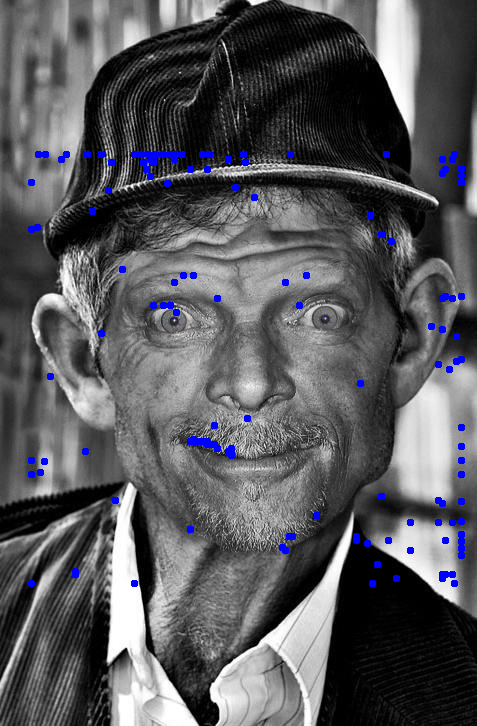

In [25]:
COUNT_POINTS = 194
row = df_predictions.loc[20]
img = Image.open(os.path.join(DIR_TEST_IMAGES, row['file_name']))
draw = ImageDraw.Draw(img)

r = 3
coord_landmarks = []
for id_point in range(COUNT_POINTS):
    name_x = F"Point_M{id_point}_X"
    name_y = F"Point_M{id_point}_Y"
    coord_landmarks.append([row[name_x], row[name_y]]) 
for coord in coord_landmarks:
    x, y = coord
    draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))
img

In [14]:
df_submit = []
for idx, row in test_points.iterrows():
    file_name = row[0]    
    point_index_list = np.array(eval(row[1]))
    
    points_for_image = df_predictions[df_predictions['file_name']==file_name]
    row_submit = dict()
    row_submit['file_name'] = file_name
    for i, idx_point in enumerate(point_index_list):
        row_submit[f'Point_M{i}_X'] = points_for_image[f'Point_M{idx_point}_X'].iloc[0]
        row_submit[f'Point_M{i}_Y'] = points_for_image[f'Point_M{idx_point}_Y'].iloc[0]
    df_submit.append(row_submit)

In [15]:
df_submit = pd.DataFrame(df_submit)

In [17]:
df_submit.to_csv('best_predict.csv', index=False)

In [22]:
df_submit.to_csv('mse_relu_base_submit.csv', index=False)